In [1]:
# For Mac compatibility
%env PYTORCH_ENABLE_MPS_FALLBACK=1

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, PatchTST, BiTCN

## Read data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/time-series-analysis/master/data/medium_views_published_holidays.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,unique_id,ds,y,published,is_holiday
0,0,2020-01-01,1131,0.0,1
1,0,2020-01-02,1764,0.0,0
2,0,2020-01-03,1699,0.0,0
3,0,2020-01-04,1322,0.0,0
4,0,2020-01-05,1491,0.0,0


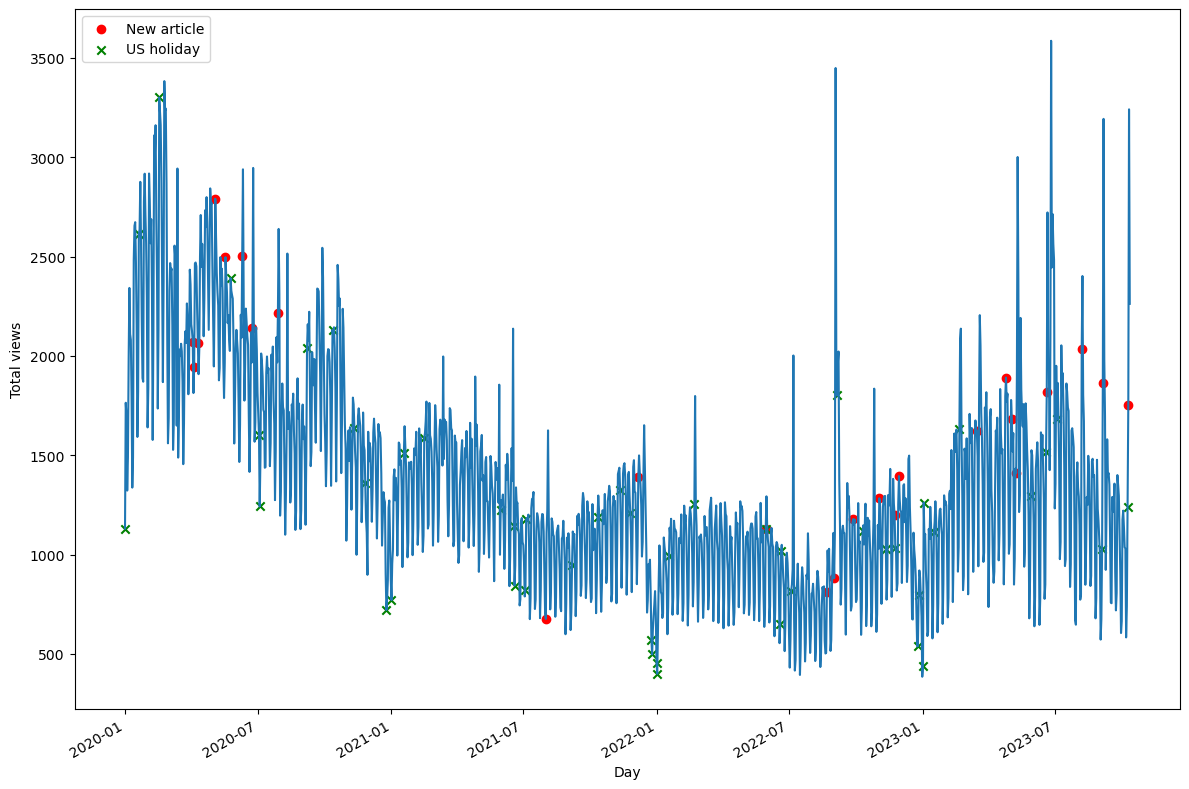

In [5]:
published_dates = df[df['published'] == 1]
holidays = df[df['is_holiday'] == 1]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df['ds'], df['y'])
ax.scatter(published_dates['ds'], published_dates['y'], marker='o', color='red', label='New article')
ax.scatter(holidays['ds'], holidays['y'], marker='x', color='green', label='US holiday')
ax.set_xlabel('Day')
ax.set_ylabel('Total views')
ax.legend(loc='best')

fig.autofmt_xdate()


plt.tight_layout()

In [6]:
## Train/test split

In [7]:
train = df[:-28]
test = df[-28:]

print(train.shape, test.shape)

(1353, 5) (28, 5)


In [8]:
# Create a future dataframe with values of exogenous variables

future_df = test.drop(['y'], axis=1)
future_df.head()

,unique_id,ds,published,is_holiday
1353,0,2023-09-15,0.0,0
1354,0,2023-09-16,0.0,0
1355,0,2023-09-17,0.0,0
1356,0,2023-09-18,0.0,0
1357,0,2023-09-19,0.0,0


## Modeling

In [10]:
horizon = len(test)

models = [
    NHITS(
        h=horizon,
        input_size = 5*horizon,
        futr_exog_list=['published', 'is_holiday'],
        hist_exog_list=['published', 'is_holiday'],
        scaler_type='robust'),
    BiTCN(
        h=horizon,
        input_size=5*horizon,
        futr_exog_list=['published', 'is_holiday'],
        hist_exog_list=['published', 'is_holiday'],
        scaler_type='robust'),
    PatchTST(
        h=horizon,
        input_size=2*horizon,
        encoder_layers=3,
        hidden_size=128,
        linear_hidden_size=128,
        patch_len=4,
        stride=1,
        revin=True,
        max_steps=1000
    )
]

Seed set to 1
Seed set to 1
Seed set to 1


In [11]:
nf = NeuralForecast(models=models, freq='D')
nf.fit(df=train)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 3.4 M 
-----------------------------------------------
3.4 M     Trainable params
0         Non-trainable params
3.4 M     Total params
13.521    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/Users/marcopeix/dev/neuralforecast/neuralforecast/common/_scalers.py:30: UserWarning: The operator 'aten::nanmedian.dim_values' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1711403226260/work/aten/src/ATen/mps/MPSFallback.mm:13.)
  x_median, _ = x_nan.nanmedian(dim=dim, keepdim=keepdim)


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name          | Type          | Params
-------------------------------------------------
0  | loss          | MAE           | 0     
1  | padder_train  | ConstantPad1d | 0     
2  | scaler        | TemporalNorm  | 0     
3  | lin_hist      | Linear        | 96    
4  | drop_hist     | Dropout       | 0     
5  | net_bwd       | Sequential    | 8.6 K 
6  | lin_futr      | Linear        | 48    
7  | drop_futr     | Dropout       | 0     
8  | net_fwd       | Sequential    | 8.6 K 
9  | drop_temporal | Dropout       | 0     
10 | temporal_lin1 | Linear        | 2.3 K 
11 | temporal_lin2 | Linear        | 476   
12 | output_lin    | Linear        | 49    
-------------------------------------------------
20.1 K    Trainable params
0         Non-trainable params
20.1 K    Total params
0.

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type              | Params
---------------------------------------------------
0 | loss         | MAE               | 0     
1 | padder_train | ConstantPad1d     | 0     
2 | scaler       | TemporalNorm      | 0     
3 | model        | PatchTST_backbone | 499 K 
---------------------------------------------------
499 K     Trainable params
3         Non-trainable params
499 K     Total params
1.999     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.


In [12]:
preds_df = nf.predict(futr_df=future_df)
preds_df.head()

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/Users/marcopeix/dev/neuralforecast/neuralforecast/core.py:190: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,NHITS,BiTCN,PatchTST
unique_id,,,,
0,2023-09-15,996.162598,1242.129517,1179.801758
0,2023-09-16,503.662598,814.150208,768.630554
0,2023-09-17,964.898071,977.790039,1006.376831
0,2023-09-18,1424.024048,1509.639771,1613.744873
0,2023-09-19,1485.082397,1594.406738,1609.146240


## Evaluation

In [14]:
test_df = pd.merge(test, preds_df, 'left', 'ds')
test_df

,unique_id,ds,y,published,is_holiday,NHITS,BiTCN,PatchTST
0,0,2023-09-15,1082,0.0,0,996.162598,1242.129517,1179.801758
1,0,2023-09-16,758,0.0,0,503.662598,814.150208,768.630554
2,0,2023-09-17,755,0.0,0,964.898071,977.790039,1006.376831
3,0,2023-09-18,1290,0.0,0,1424.024048,1509.639771,1613.744873
4,0,2023-09-19,1214,0.0,0,1485.082397,1594.406738,1609.146240
5,0,2023-09-20,1244,0.0,0,1486.657593,1578.301147,1649.837158
6,0,2023-09-21,1357,0.0,0,1607.760254,1594.267334,1645.650024
7,0,2023-09-22,915,0.0,0,1299.670410,1287.351685,1520.643188
8,0,2023-09-23,719,0.0,0,861.144653,857.339355,1009.061279
9,0,2023-09-24,807,0.0,0,1059.980835,976.244385,1118.207397


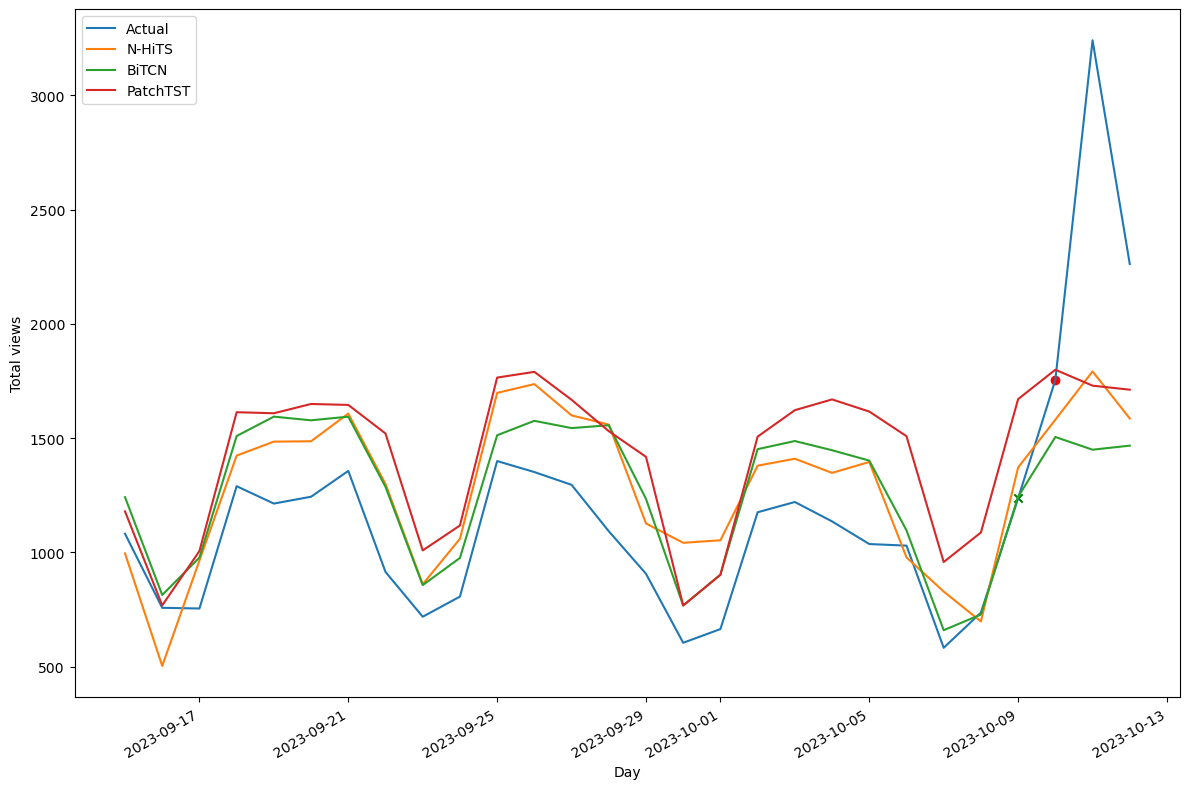

In [15]:
published_dates = test_df[test_df['published'] == 1]
holidays = test_df[test_df['is_holiday'] == 1]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(test_df['ds'], test_df['y'], label='Actual')
ax.plot(test_df['ds'], test_df['NHITS'], label='N-HiTS')
ax.plot(test_df['ds'], test_df['BiTCN'], label='BiTCN')
ax.plot(test_df['ds'], test_df['PatchTST'], label='PatchTST')
ax.scatter(published_dates['ds'], published_dates['y'], marker='o', color='red')
ax.scatter(holidays['ds'], holidays['y'], marker='x', color='green')
ax.set_xlabel('Day')
ax.set_ylabel('Total views')
ax.legend(loc='best')

fig.autofmt_xdate()


plt.tight_layout()

In [24]:
from utilsforecast.losses import mae, smape
from utilsforecast.evaluation import evaluate

evaluation = evaluate(
    test_df,
    metrics=[mae, smape],
    models=["NHITS", "BiTCN", "PatchTST"],
    target_col="y",
)

evaluation = evaluation.drop(['unique_id'], axis=1)
evaluation = evaluation.set_index('metric')

evaluation.style.highlight_min(color='blue', axis=1)

,NHITS,BiTCN,PatchTST
metric,,,
mae,302.212956,295.777778,396.284971
smape,0.120271,0.108780,0.149934
